In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
import seaborn as sns

In [8]:
sns.set_theme()

<AxesSubplot:xlabel='Gender', ylabel='Count'>

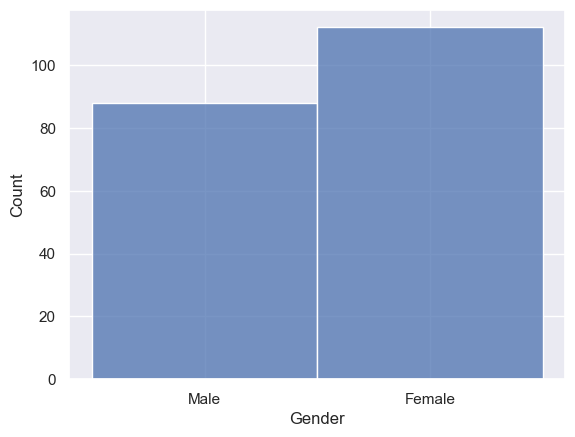

In [9]:
sns.histplot(data=df, x="Gender", stat="count")

<AxesSubplot:xlabel='Age', ylabel='Count'>

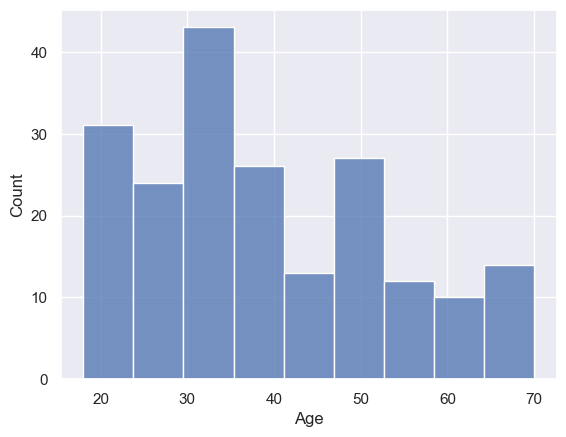

In [11]:
sns.histplot(data=df, x="Age", stat="count")

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

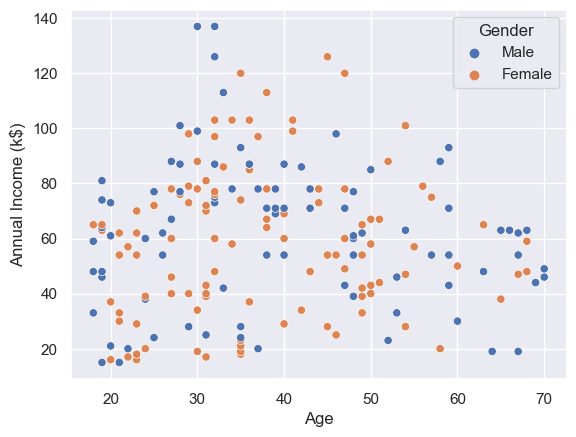

In [14]:
sns.scatterplot(data=df, x="Age", y="Annual Income (k$)", hue = "Gender")

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

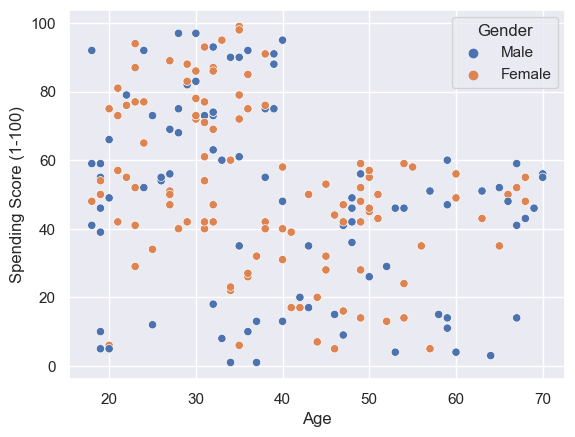

In [15]:
sns.scatterplot(data=df, x="Age", y= "Spending Score (1-100)", hue = "Gender")

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

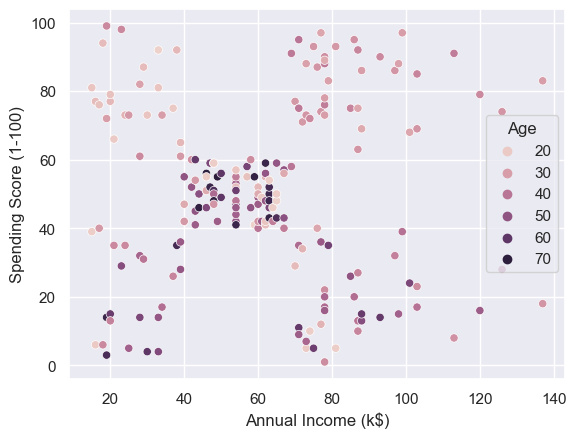

In [16]:
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue = "Age")

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

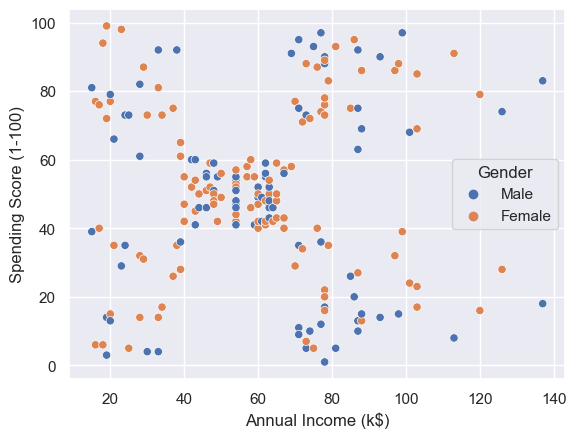

In [17]:
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue = "Gender")

In [19]:
df_gender = pd.get_dummies(df["Gender"])
df = pd.concat([df,df_gender], axis = 1)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,0


In [26]:
df = df.drop(columns = ["CustomerID", "Gender"])
df.head()

KeyError: "['CustomerID', 'Gender'] not found in axis"

In [27]:
df.shape

(200, 5)

In [28]:
from sklearn.cluster import KMeans

In [42]:
wcss = []
dunn = {}
for i in range(2,11) :
    kmean = KMeans(i)
    kmean.fit(df)
    wcss_iter = kmean.inertia_
    wcss.append(wcss_iter)
    
#     y_pred = kmean.predict(df)
#     pred = pd.DataFrame(y_pred)
#     pred.columns = ["TargetClass"]        
#     prediction = pd.concat([df,pred], axis = 1)
    
#     temp = []
#     for j in range(i) :
#         temp.append(prediction.loc[prediction.TargetClass == j].values)
    
#     key = "Clus" + str(i)
#     dunn[key] = temp
        
        
        
        
    

/Users/kushshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kushshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kushshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kushshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

<AxesSubplot:>

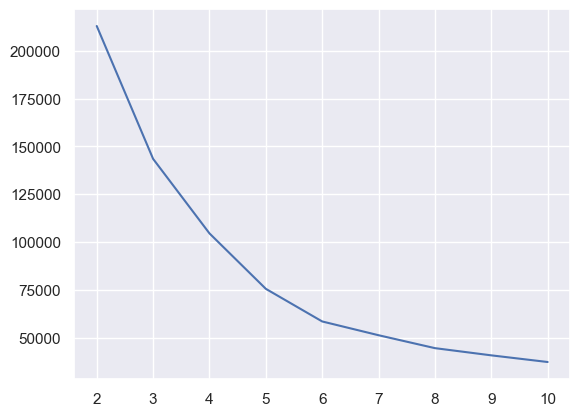

In [43]:
k = range(2,11)
sns.lineplot(x=k, y=wcss)

In [44]:
kmeans = KMeans(5)
kmeans.fit(df)

/Users/kushshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [47]:
y_pred = kmeans.predict(df)
pred = pd.DataFrame(y_pred)
pred.columns = ["Target class"]

outputDf = pd.concat([df,pred], axis = 1)
outputDf.head()

,Age,Annual Income (k$),Spending Score (1-100),Female,Male,Target class
0,19,15,39,0,1,2
1,21,15,81,0,1,0
2,20,16,6,1,0,2
3,23,16,77,1,0,0
4,31,17,40,1,0,2


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

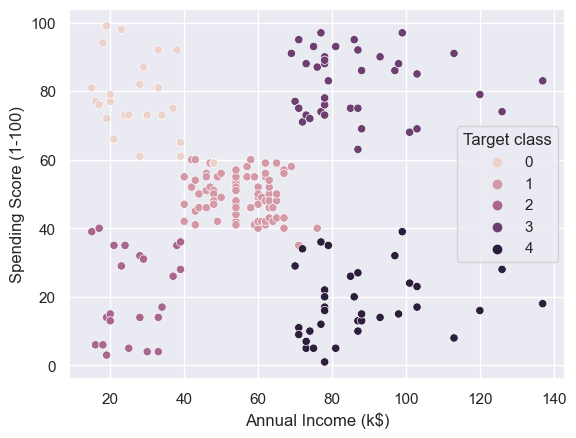

In [50]:
sns.scatterplot(data=outputDf, x="Annual Income (k$)", y="Spending Score (1-100)", hue = "Target class")